## LAB - 06 : Logistic Regression

#### Q6> In this assignment, you need to classify the given dataset using logistic regression.
##### Database
##### Independent/Predictor Variable - logisticX.csv
##### Dependent/Response Variable - logisticY.csv 
##### Use the same cost function that we had discussed in class.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
x=pd.read_csv("logisticX.csv",header=None)
y=pd.read_csv("logisticY.csv",header=None)

In [5]:
x.head()

,0,1
0,3.8915,4.2105
1,3.6898,6.6051
2,2.7763,7.5057
3,3.1137,5.7724
4,2.9251,5.4315


In [6]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
print("X Shape:",x.shape)
print("Y Shape:",y.shape)

X Shape: (100, 2)
Y Shape: (100, 1)


In [8]:
print("X Description:\n",x.describe())
print("Y Description:\n",y.describe())

X Description:
                 0           1
count  100.000000  100.000000
mean     4.618717    4.522868
std      1.325572    1.394154
min      1.440000    1.537200
25%      3.706600    3.595875
50%      4.523700    4.544700
75%      5.539200    5.506450
max      8.415300    7.505700
Y Description:
                 0
count  100.000000
mean     0.500000
std      0.502519
min      0.000000
25%      0.000000
50%      0.500000
75%      1.000000
max      1.000000


In [9]:
print("Missing values in X:\n",x.isnull().sum())
print("Missing values in Y:\n",y.isnull().sum())

Missing values in X:
 0    0
1    0
dtype: int64
Missing values in Y:
 0    0
dtype: int64


In [10]:
x=(x-x.mean())/x.std()
x.head()

,0,1
0,-0.548606,-0.224056
1,-0.700767,1.493545
2,-1.389903,2.139528
3,-1.135372,0.896265
4,-1.277650,0.651744


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(80, 2) (20, 2) (80, 1) (20, 1)


#### Q6.1> Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1. What is the cost function 
####       value and learning parameter value after convergence?

In [13]:
class GDs:
 def __init__(self, lr, ep):
  self.lr=lr
  self.ep=ep
  self.w=None
  self.b=0
  self.cost_hist=[]
 
 def sigmoid(self,z):
  return 1/(1+np.exp(-z))
 
 def fit(self,x,y):
  x=np.array(x)
  y=np.array(y).flatten()
  m,n=x.shape
  self.w=np.zeros(n)
  for i in range(self.ep):
   z=np.dot(x,self.w)+self.b
   y_pred=self.sigmoid(z)
   dw=(1/m)*np.dot(x.T,(y_pred-y))
   db=(1/m)*np.sum(y_pred-y)
   self.w-=self.lr*dw
   self.b-=self.lr*db
   cost=-(1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
   self.cost_hist.append(cost)
 
 def predict(self,x):
  return (self.sigmoid(np.dot(x,self.w)+self.b)>=0.5).astype(int)

In [14]:
model=GDs(lr=0.1,ep=10000)
model.fit(x_train,y_train)
print("Final Cost:",model.cost_hist[-1],"\nWeights:",model.w,"\nBias:",model.b)

Final Cost: 0.23715367344824523 
Weights: [ 2.540013  -2.5843135] 
Bias: 0.7489117522439074


#### Q6.2> Plot cost function v/s iteration graph for the model trained in question 6.1.
###  NOTE : Don't use Scatter Plot. 

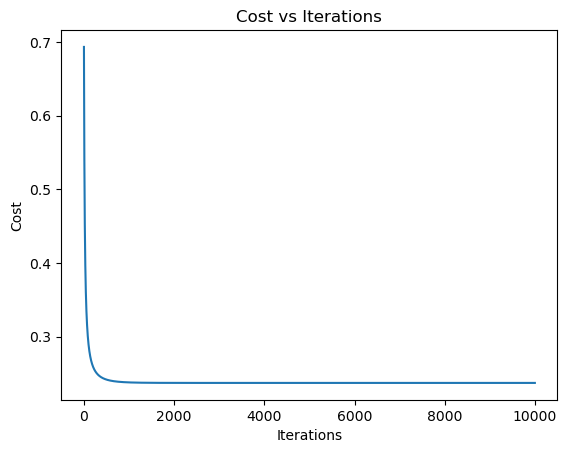

In [16]:
plt.plot(model.cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

#### Q6.3> Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you
####       obtained in question 1. Do not use scatter plot.

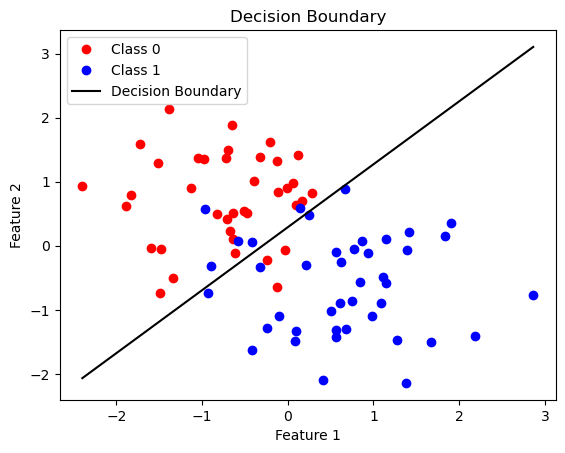

In [18]:
x1_class0 = x_train[0][y_train[0] == 0].values
x2_class0 = x_train[1][y_train[0] == 0].values
x1_class1 = x_train[0][y_train[0] == 1].values
x2_class1 = x_train[1][y_train[0] == 1].values
plt.plot(x1_class0, x2_class0,'ro',label="Class 0")
plt.plot(x1_class1, x2_class1,'bo',label="Class 1") 
x1 =np.linspace(x[0].min(),x[0].max(),100)
x2 =(-model.w[0]*x1-model.b)/model.w[1]
plt.plot(x1,x2,label="Decision Boundary",color="black")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary")
plt.show()

#### 6.4> Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on the same graph.     For this task, only train your model for 100 iterations.

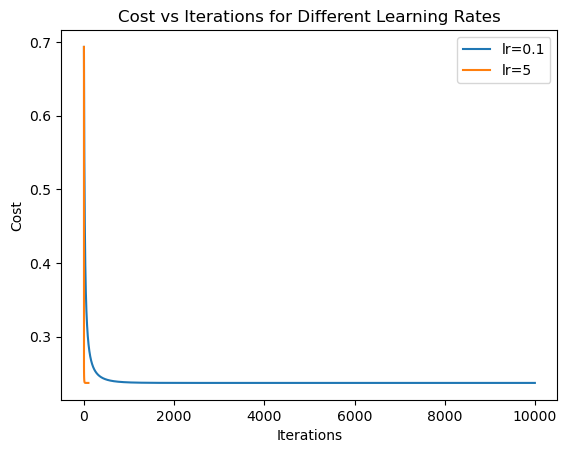

In [20]:
model2=GDs(lr=5,ep=100)
model2.fit(x_train,y_train)
plt.plot(model.cost_hist,label="lr=0.1")
plt.plot(model2.cost_hist,label="lr=5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost vs Iterations for Different Learning Rates")
plt.show()

#### Q6.5> Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.

In [22]:
y_pred=model.predict(x_test)
cm=np.zeros((2,2),dtype=int)
for i in range(len(y_test)):
 cm[y_test.iloc[i, 0]][y_pred[i]]+=1

acc=np.trace(cm)/np.sum(cm)
prec=cm[1,1]/(cm[1,1]+cm[0,1])
rec=cm[1,1]/(cm[1,1]+cm[1,0])
f1=2*(prec*rec)/(prec+rec)

print("Confusion Matrix:\n",cm)
print(f"Accuracy: {acc:.4f}, \nPrecision: {prec:.4f}, \nRecall: {rec:.4f}, \nF1-score: {f1:.4f}")

Confusion Matrix:
 [[10  2]
 [ 0  8]]
Accuracy: 0.9000, 
Precision: 0.8000, 
Recall: 1.0000, 
F1-score: 0.8889


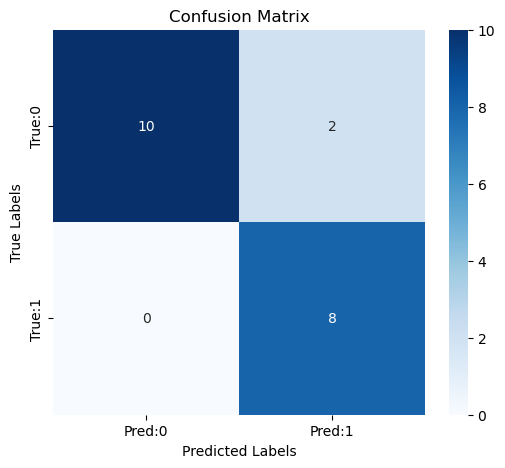

In [23]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,fmt="d",cmap="Blues",xticklabels=["Pred:0", "Pred:1"],yticklabels=["True:0","True:1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()